In [ ]:
import help_funcs as hf

In [7]:
import numpy as np
N = 20


def create_matrices(N):
    f = lambda x,y,z: 3*np.pi*np.pi*np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)
    u = lambda x,y,z: np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)

    U = np.zeros((N+2,N+2,N+2))
    U_true = np.zeros((N+2,N+2,N+2))
    F = np.zeros((N+2,N+2,N+2))
    step_size = 2/(N+1)
    for i in range(N+2):
        z = -1 + step_size*i
        for j in range(N+2):
            y = -1 + step_size*j
            for k in range(N+2):
                x = -1 + step_size*k
                
                F[i][j][k] = f(x,y,z)
                U_true[i][j][k] = u(x,y,z)
    
    return U, U_true, F

In [8]:
def gauss_seidel(U, F, tol = 0.0001, iter_max = 2000):
    U_ = U.copy()
    N = U.shape[0]-2
    step_size = 2/(N+1)
    diff = np.inf
    iteration = 1
    while (diff > tol) & (iteration <= iter_max):
        diff = 0
        for i in range(1, N+1):
            for j in range(1, N+1):
                for k in range(1, N+1):
                    diff_tmp = 1/6 * (
                        U_[i-1][j][k] + 
                        U_[i+1][j][k] + 
                        U_[i][j-1][k] + 
                        U_[i][j+1][k] + 
                        U_[i][j][k-1] + 
                        U_[i][j][k+1] + 
                        step_size * step_size * F[i][j][k])
                    diff += (diff_tmp - U_[i][j][k]) * (diff_tmp - U_[i][j][k])
                    U_[i][j][k] = diff_tmp
        diff = np.sqrt(diff/(N**3))
        iteration += 1

    print("Number of iterations: ", iteration-1, " with diff: ", diff)
    return U_, iteration

# U_new = gauss_seidel(U, F)


In [16]:
from tqdm import tqdm
N= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tol = 0.0001
errors = np.zeros(len(N))
iters = np.zeros(len(N))

for i, n in tqdm(enumerate(N)):
    print("N = ", n)
    U, U_true, F = create_matrices(n)
    U_new, iter = gauss_seidel(U, F, tol = tol, iter_max = 200)

    assert all([
        U_new[:, :, 0].sum() == 0,
        U_new[:, :,-1].sum() == 0,
        U_new[:, 0, :].sum() == 0,
        U_new[:, -1, :].sum() == 0,
        U_new[0, :, :].sum() == 0,
        U_new[-1, :, :].sum() == 0,
    ])

    U_err = U_new - U_true
    err = np.sqrt((U_err[1:-1][1:-1][1:-1]**2).mean())

    errors[i] = err
    iters[i] = iter

    print("err: ", err)
    print("\n")

1it [00:00,  5.89it/s]

N =  10
Number of iterations:  27  with diff:  9.046341566988682e-05
err:  0.009390053541620702


N =  20


2it [00:02,  1.45s/it]

Number of iterations:  68  with diff:  9.706284915116875e-05
err:  0.0023127299333166374


N =  30


3it [00:16,  7.33s/it]

Number of iterations:  125  with diff:  9.670475982447173e-05
err:  0.001461899408481212


N =  40


4it [01:09, 25.12s/it]

Number of iterations:  192  with diff:  9.826946794558197e-05
err:  0.0035267000506117876


N =  50


5it [02:53, 53.54s/it]

Number of iterations:  200  with diff:  0.000270378557945698
err:  0.017261650428188297


N =  60


6it [05:55, 97.45s/it]

Number of iterations:  200  with diff:  0.00046569606246708856
err:  0.04338720690405451


N =  70


7it [10:48, 161.17s/it]

Number of iterations:  200  with diff:  0.0005948033634266226
err:  0.07549570905746543


N =  80


8it [17:55, 245.77s/it]

Number of iterations:  200  with diff:  0.0006537209876936755
err:  0.1082469797874522


N =  90


9it [28:09, 360.94s/it]

Number of iterations:  200  with diff:  0.0006627382234030815
err:  0.13867633602538493


N =  100


10it [42:21, 254.12s/it]

Number of iterations:  200  with diff:  0.0006421226015918668
err:  0.1656310894691749




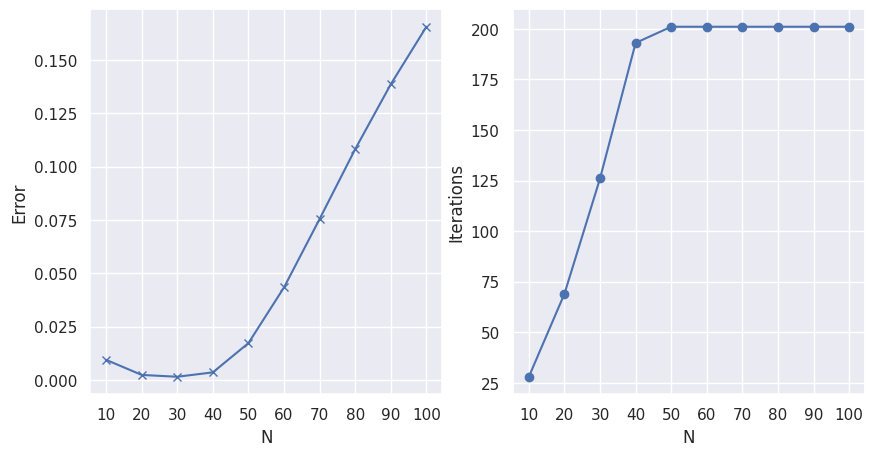

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, axes = plt.subplots(1,2, figsize = (10, 5))

ax = axes[0]
ax.plot(errors, marker = "x")
ax.set_xlabel("N")
ax.set_xticks(range(len(N)))
ax.set_xticklabels(N)
ax.set_ylabel("Error")

ax = axes[1]
ax.plot(iters, marker = "o")
ax.set_xlabel("N")
ax.set_xticks(range(len(N)))
ax.set_xticklabels(N)
ax.set_ylabel("Iterations")


plt.show()

In [22]:
import pandas as pd

df = pd.DataFrame()
df["n"] = N
df["errors"] = errors
df["iters"] = iters
df["times"] = [0.1, 2, 16, 1*60+9, 2*60+53, 5*60+55, 10*60+48, 17*60+55, 28*60+9, 42*60+21]
df["norm_diff"] = [9.046341566988682e-05,9.706284915116875e-05,9.670475982447173e-05,9.826946794558197e-05,
0.000270378557945698,0.00046569606246708856,0.0005948033634266226,0.0006537209876936755,0.0006627382234030815,0.0006421226015918668]

for i in range(1, len(N)):
    df["times"][i] -= df["times"][i-1]

df.to_csv("dummy_data_N.csv", index = False)

df

/tmp/ipykernel_225688/2592233490.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["times"][i] -= df["times"][i-1]


,n,errors,iters,times,norm_diff
0,10,0.009390,28.0,0.1,0.000090
1,20,0.002313,69.0,1.9,0.000097
2,30,0.001462,126.0,14.1,0.000097
3,40,0.003527,193.0,54.9,0.000098
4,50,0.017262,201.0,118.1,0.000270
5,60,0.043387,201.0,236.9,0.000466
6,70,0.075496,201.0,411.1,0.000595
7,80,0.108247,201.0,663.9,0.000654
8,90,0.138676,201.0,1025.1,0.000663
9,100,0.165631,201.0,1515.9,0.000642
